In [160]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import scipy
import sklearn
import seaborn as sns

In [161]:
data_path = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
             "master/sms_spam_collection/SMSSpamCollection"
            )

In [162]:
sms_raw = pd.read_csv(data_path, delimiter= "\t", header=None)
sms_raw.columns = ["spam", "message"]

In [163]:
sms_raw.head(10)

,spam,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [164]:
keywords = ["cash", "click", "offer", "winner", "urgent", "free", "link", "congrats", "freemsg", "!!", "pls", "sexy", "check out"]

for key in keywords:
    sms_raw[str(key)] = sms_raw.message.str.contains(str(key),
        case=False)
    
    #sms_raw[str(key)] = sms_raw.message.str.contains(" " + str(key) + " ", case=False)

In [165]:
sms_raw.head(10)

,spam,message,cash,click,offer,winner,urgent,free,link,congrats,freemsg,!!,pls,sexy,check out
0,ham,"Go until jurong point, crazy.. Available only ...",False,False,False,False,False,False,False,False,False,False,False,False,False
1,ham,Ok lar... Joking wif u oni...,False,False,False,False,False,False,False,False,False,False,False,False,False
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,False,False,False,False,False,True,False,False,False,False,False,False,False
3,ham,U dun say so early hor... U c already then say...,False,False,False,False,False,False,False,False,False,False,False,False,False
4,ham,"Nah I don't think he goes to usf, he lives aro...",False,False,False,False,False,False,False,False,False,False,False,False,False
5,spam,FreeMsg Hey there darling it's been 3 week's n...,False,False,False,False,False,True,False,False,True,False,False,False,False
6,ham,Even my brother is not like to speak with me. ...,False,False,False,False,False,False,False,False,False,False,False,False,False
7,ham,As per your request 'Melle Melle (Oru Minnamin...,False,False,False,False,False,False,False,False,False,False,False,False,False
8,spam,WINNER!! As a valued network customer you have...,False,False,False,True,False,False,False,False,False,True,False,False,False
9,spam,Had your mobile 11 months or more? U R entitle...,False,False,False,False,False,True,False,False,False,False,False,False,False


In [166]:
sms_raw["allcaps"] = sms_raw.message.str.isupper()

In [167]:
sms_raw.head(20)

,spam,message,cash,click,offer,winner,urgent,free,link,congrats,freemsg,!!,pls,sexy,check out,allcaps
0,ham,"Go until jurong point, crazy.. Available only ...",False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,ham,Ok lar... Joking wif u oni...,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,ham,U dun say so early hor... U c already then say...,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,ham,"Nah I don't think he goes to usf, he lives aro...",False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,spam,FreeMsg Hey there darling it's been 3 week's n...,False,False,False,False,False,True,False,False,True,False,False,False,False,False
6,ham,Even my brother is not like to speak with me. ...,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,ham,As per your request 'Melle Melle (Oru Minnamin...,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,spam,WINNER!! As a valued network customer you have...,False,False,False,True,False,False,False,False,False,True,False,False,False,False
9,spam,Had your mobile 11 months or more? U R entitle...,False,False,False,False,False,True,False,False,False,False,False,False,False,False


In [168]:
#sms_raw["spam"] = (sms_raw["spam"] == "spam")

In [169]:
sms_raw.head()

,spam,message,cash,click,offer,winner,urgent,free,link,congrats,freemsg,!!,pls,sexy,check out,allcaps
0,ham,"Go until jurong point, crazy.. Available only ...",False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,ham,Ok lar... Joking wif u oni...,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,ham,U dun say so early hor... U c already then say...,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,ham,"Nah I don't think he goes to usf, he lives aro...",False,False,False,False,False,False,False,False,False,False,False,False,False,False


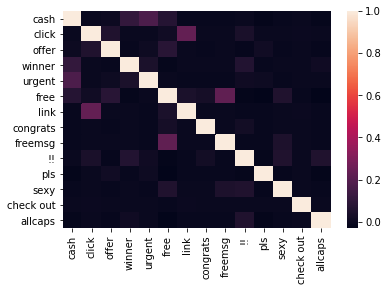

In [170]:
sns.heatmap(sms_raw.corr())

In [171]:
data = sms_raw[keywords + ["allcaps"]]
target = sms_raw["spam"]

In [172]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
y_pred = bnb.fit(data, target).predict(data)
print("Number of mislabeled points out of a total of {} points: {}".format(data.shape[0], (target != y_pred).sum()))

Number of mislabeled points out of a total of 5572 points: 499


In [173]:
print("The percent accuracy of this classifier is", (target != y_pred).sum() / data.shape[0])

The percent accuracy of this classifier is 0.08955491744436468


In [174]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[4731,   94],
       [ 405,  342]], dtype=int64)

In [175]:
# Build your confusion matrix and calculate sensitivity and specificity here.
correct_ham = len(sms_raw[sms_raw["spam"] == y_pred][sms_raw["spam"] == False])
false_positive = len(sms_raw[sms_raw["spam"] != y_pred][sms_raw["spam"] == False])
correct_spam = len(sms_raw[sms_raw["spam"] == y_pred][sms_raw["spam"]== True])
false_negative = len(sms_raw[sms_raw["spam"] != y_pred][sms_raw["spam"] == True])

array = [[correct_ham, false_positive], [correct_spam, false_positive]]
print(array)
print("Sensitivity: ", correct_spam / (correct_spam + false_negative) )
print("Specificity: ", correct_ham / (correct_ham + false_positive) )

[[0, 0], [0, 0]]


C:\Users\jesst\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\jesst\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\jesst\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\jesst\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


ZeroDivisionError: division by zero

In [176]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=.2, random_state=20)
print("With 20% holdout: ", bnb.fit(X_train, y_train).score(X_test, y_test))
print("Testing on sample: ", bnb.fit(data, target).score(data, target))


With 20% holdout:  0.9040358744394619
Testing on sample:  0.9104450825556353


In [177]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=4)

array([0.91176471, 0.91744436, 0.89949749, 0.90517241])

In [178]:
sms_raw.shape[0] / 4


1393.0

In [179]:
fold_1 = sms_raw.iloc[0:1393, :]
fold_2 = sms_raw.iloc[1393:2786, :]
fold_3 = sms_raw.iloc[2786:4179, :]
fold_4 = sms_raw.iloc[4179:5572, :]

    

In [180]:
folds = [fold_1, fold_2, fold_3, fold_4]

for fold in folds:
    data = fold[keywords + ["allcaps"]]
    target = fold["spam"]
    bnb = BernoulliNB()
    y_pred = bnb.fit(data, target).predict(data)
    print((data.shape[0] - (target != y_pred).sum()) / data.shape[0])

0.9095477386934674
0.9217516152189519
0.9066762383345298
0.9073941134242641


In [181]:
data = sms_raw[keywords + ["allcaps"]]
target = sms_raw["spam"]

bnb = BernoulliNB()
y_pred = bnb.fit(data, target).predict(data)
print("Number of mislabeled points out of a total of {} points: {}".format(data.shape[0], (target != y_pred).sum()))
(target != y_pred).sum() / data.shape[0])

SyntaxError: invalid syntax (<ipython-input-181-eadf55fbc5bf>, line 7)

In [182]:
target.shape

(1393,)

In [ ]:
sms_raw[sms_raw["spam"] != y_pred].head(30)